# Obtain detuning from FID

In [266]:
from matplotlib import pyplot as plt
import scipy as sc
import pandas as pd
import numpy as np

#absolute path of repo root
rel_path = "/home/ben/Documents/Repos/382L_NMRLab/"

In [267]:
FIDData = pd.read_csv(rel_path+"data/FID/6477681.csv")

#trim out saturated data
cutoff = 520
chan1 = FIDData["v1"][cutoff:].values
chan2 = FIDData["v2"][cutoff:].values
tlist = FIDData["t"][cutoff:].values

#adjust y axis (needed for getting maxima by squaring)
pulse_endtime = 1500
chan1 = np.subtract(chan1, np.mean(chan1[1500:]))
chan2 = np.subtract(chan2, np.mean(chan1[1500:]))

#tstep is 2e-6 (units of seconds)
tstep = tlist[1]-tlist[0]

In [268]:
def smooth(y, pts): #Rolling avg smoothing
    box = np.ones(pts)/pts
    yfilt=np.convolve(y,box,mode='same')
    return yfilt

In [269]:
chan1_smooth = smooth(chan1, 40)
chan2_smooth = smooth(chan2, 40)

I messed up here! You are right, the maxima are shifted by the envelope. The zeros are not however.

In [270]:
peaks1, _ = sc.signal.find_peaks(
    np.square(chan1_smooth),
   # height = .2,
    distance = 250,
    #prominence = .5,
    width = 100
)

peaks2, _ = sc.signal.find_peaks(
    np.square(chan2_smooth),
    height = .2,
    distance = 250,
    prominence = .5,
    width = 7
)

Text(0, 0.5, 'Voltage (V)')

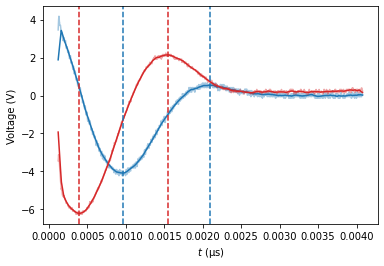

In [271]:
plt.plot(tlist, chan1, color = "tab:blue", alpha = .4)
plt.plot(tlist, chan1_smooth, color = "tab:blue")
plt.plot(tlist, chan2, color = "tab:red", alpha = .4)
plt.plot(tlist, chan2_smooth, color = "tab:red")
for peak in peaks1:
    plt.axvline(tlist[peak], color = "tab:blue", linestyle = "--")
for peak in peaks2:
    plt.axvline(tlist[peak], color = "tab:red", linestyle = "--")

plt.xlabel(r"$t$ (μs)")
plt.ylabel("Voltage (V)")

## Find zeros

In [334]:
def zeros(ydata, min_spacing, num):
    absdata = np.abs(ydata)
    zeros = []
    counter = 0
    for i in range(num):
        new_zero = np.argmin(absdata)
        zeros.append(new_zero+counter)
        absdata = absdata[new_zero+min_spacing:]
        counter += new_zero+min_spacing
    return zeros

In [335]:
zeros1 = zeros(chan1, 500, 2)
zeros2 = zeros(chan2, 500, 2)

Text(0, 0.5, 'Voltage (V)')

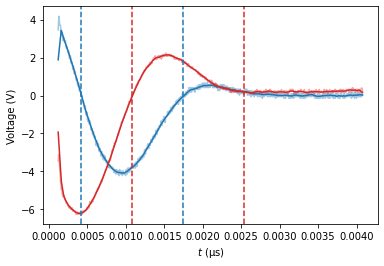

In [337]:
plt.plot(tlist, chan1, color = "tab:blue", alpha = .4)
plt.plot(tlist, chan1_smooth, color = "tab:blue")
plt.plot(tlist, chan2, color = "tab:red", alpha = .4)
plt.plot(tlist, chan2_smooth, color = "tab:red")
for zero in zeros1:
    plt.axvline(tlist[zero], color = "tab:blue", linestyle = "--")
for zero in zeros2:
    plt.axvline(tlist[zero], color = "tab:red", linestyle = "--")

plt.xlabel(r"$t$ (μs)")
plt.ylabel("Voltage (V)")

In [339]:
## Detuning (Hz)
delta_omega = 1/((2*zeros1[1]-zeros1[0])*tstep)

In [340]:
#Resonant frequency
omega_0 = 6477681 - delta_omega
print(omega_0)

6477340.863945578
